In [1]:
import torch
import d2l_tools as d2l
from torch import nn

In [2]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.1)

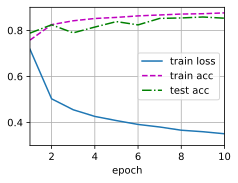

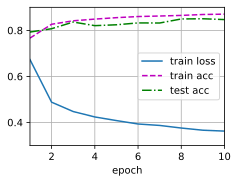

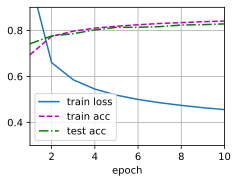

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

methods = [nn.ReLU, nn.Tanh, nn.Sigmoid]
loss = nn.CrossEntropyLoss(reduction="none")

estimates = []

for method in methods:
    net = nn.Sequential(nn.Flatten(),
                         nn.Linear(784,256),
                         method(),
                         nn.Linear(256,10))
    net.apply(init_weights)
    trainer = torch.optim.SGD(net.parameters(), lr = lr)
    estimates.append(d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer))

In [4]:
estimates
# 可以看到本例效果都差不多

[(0.3505928325653076, 0.8760333333333333, 0.8529),
 (0.3621719929695129, 0.8704833333333334, 0.8469),
 (0.45547831344604495, 0.8404166666666667, 0.8281)]

***练习***
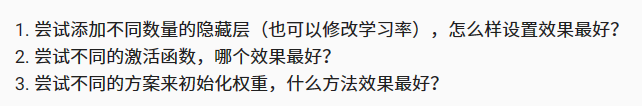

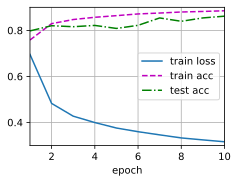

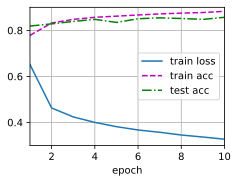

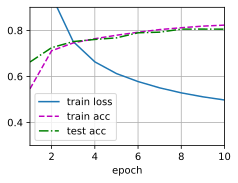

In [5]:
# 增加一层
for method in methods:
    net = nn.Sequential(nn.Flatten(),
                         nn.Linear(784,256),
                         method(),
                         nn.Linear(256,128),
                         method(),
                         nn.Linear(128,10))
    net.apply(init_weights)
    trainer = torch.optim.SGD(net.parameters(), lr = lr)
    estimates.append(d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer))

In [6]:
estimates
# 没提升多少(甚至用sigmoid增加层数准确率还降低了)

[(0.3505928325653076, 0.8760333333333333, 0.8529),
 (0.3621719929695129, 0.8704833333333334, 0.8469),
 (0.45547831344604495, 0.8404166666666667, 0.8281),
 (0.3158295079867045, 0.8851833333333333, 0.8617),
 (0.32697143367131554, 0.8828166666666667, 0.8568),
 (0.49735731951395673, 0.8228166666666666, 0.8052)]

初始化权重方法

参考:https://zhuanlan.zhihu.com/p/101313762
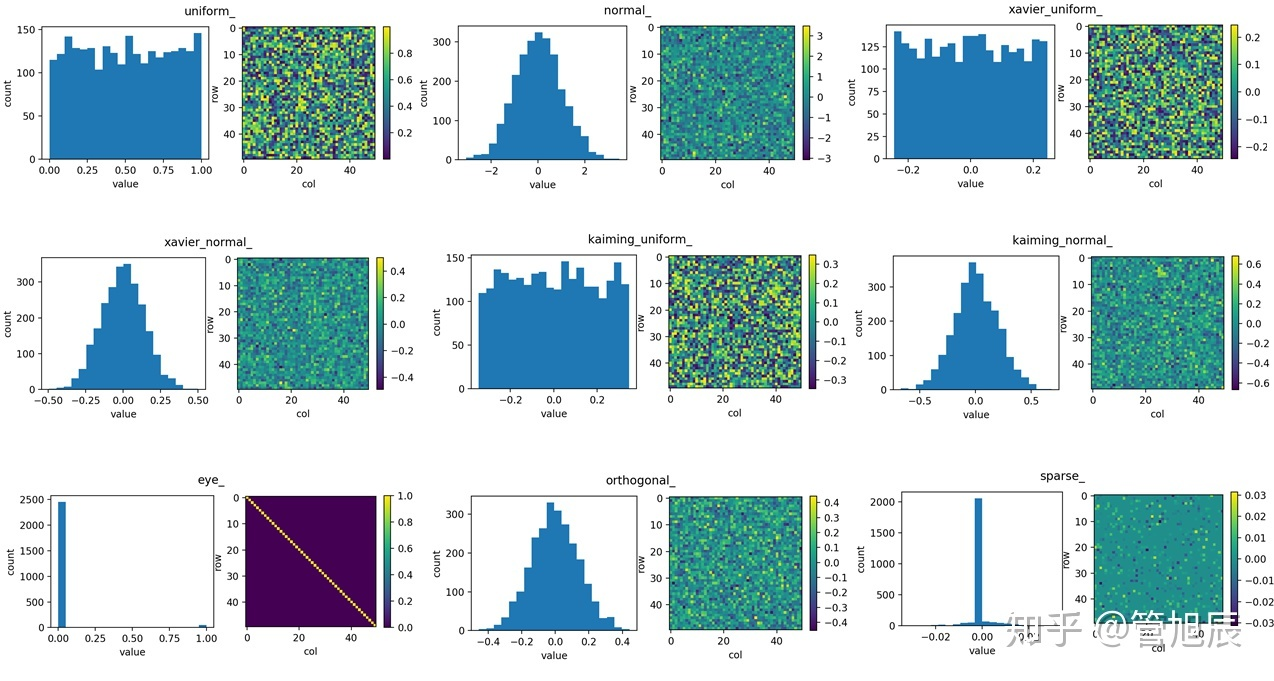